# __Immigration__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Immigration is divided into _four_ subcategories: 

# __4. Visa :__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Immigration/visa.csv")
df.head()

,full_text,sentiment
0,recently scammed by airasia at bangalore airpo...,Negative
1,kushanmitra canada has all the leverage 5 eye...,Neutral
2,why is coral card visa platinum international...,Negative
3,so many many passengers are facing inconvenien...,Positive
4,i had a good experience in my flights but it...,Negative


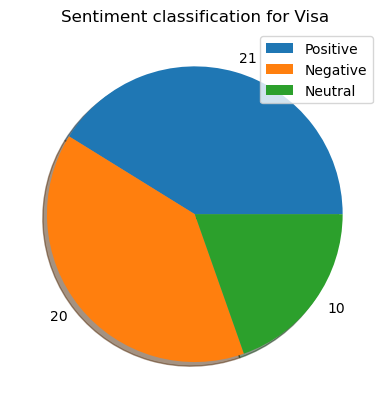

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
visa_count = val.values

#Plotting a pie chart
plt.pie(visa_count, labels = visa_count, shadow= True)
plt.title("Sentiment classification for Visa")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding Visa:

### Topic Modelling

In [4]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['full_text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: visa, kindly, flight, dear, stay, sir, need, valid, arrival, board
Topic 2: ur, visa, arrange, arrival, visas, urgent, check, respected, days, flight
Topic 3: visa, need, come, country, like, germany, travelling, flights, days, staff
Topic 4: help, urgent, staff, board, visa, ur, arrange, arrival, visas, check
Topic 5: ur, visa, arrange, arrival, visas, urgent, check, respected, days, flight
Topic 6: new, help, visa, stuck, year, visas, arrange, business, respected, days
Topic 7: arrival, customs, visa, know, officer, sure, immigration, amp, ur, arrange
Topic 8: immigration, amp, visa, minister, german, valid, sir, help, arrival, customs
Topic 9: access, lounge, credit, visa, card, ur, arrange, arrival, visas, urgent
Topic 10: free, visa, entry, card, check, access, lounge, year, ur, arrange


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

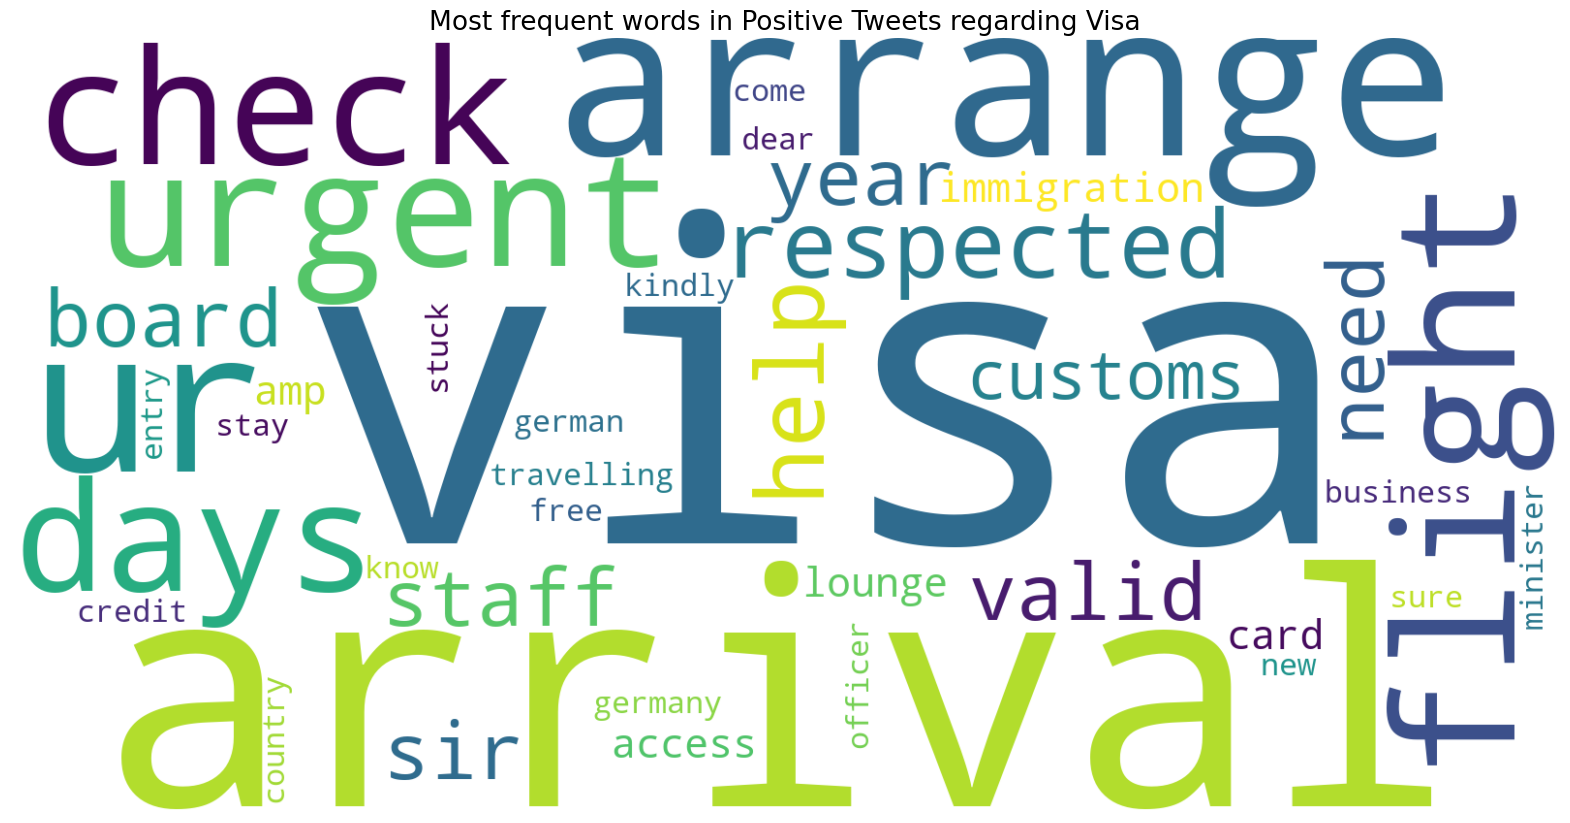

In [5]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Visa', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Visa
#### 1. many travellers have appreciated the cooperation airport staff showed when there were issues with their visas
#### 2. Businnessmen travelling different countries on a regular basis are well satisfied by swift visa approvals during urgent times
#### 3. Foreign visitors are impressed by the systematic procedure which is easy to go through

## b.Topic modelling and wordcloud for negative tweets regarding Visa:

### Topic Modelling

In [6]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['full_text'].tolist()

#Creating custom stop words
custom = ["sick","shouting","unhealthy","mid","reddy","pathetic","coke","scam","swiggy"]
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 7
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: absolutely, india, entry, want, just, refused, visa, flights, worst, man
Topic 2: visa, card, lounge, access, check, denied, does, signature, claim, experience
Topic 3: visa, worst, lounge, officer, stuck, flights, india, man, absolutely, need
Topic 4: denied, visa, india, reason, experience, lounge, today, flight, card, board
Topic 5: visas, went, staff, need, check, transit, want, just, visa, flights
Topic 6: visa, man, india, website, entry, need, stuck, immigration, valid, refused
Topic 7: board, did, visa, hours, time, flight, allow, valid, told, officer


### Word Cloud

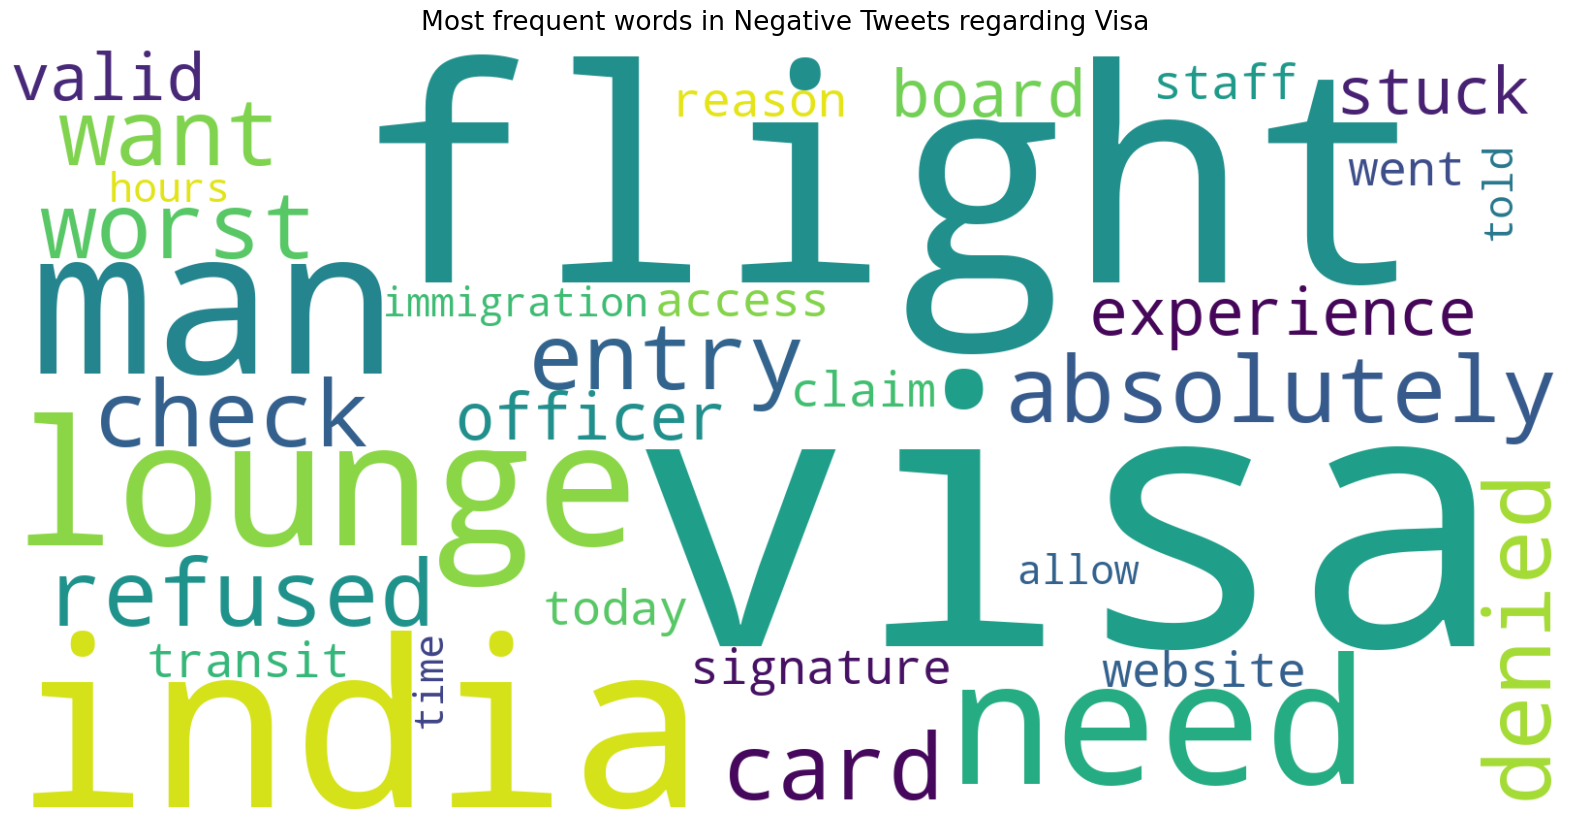

In [7]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Visa', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding Visa
#### 1. People being stuck at the airport due to problems with the visas is reported a lot
#### 2. Many instances of asking bribes by the officers have been reported
#### 3. Travellers have complained about being stopped by officials and asked to book return tickets before check-in